# Objective
Detect and handle missing data

## Import libraries and Loading data

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import missingno as msno

In [324]:
df = pd.read_csv('india-air-quality-2015-2020/city_hour.csv')

In [325]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [326]:
# Get only data of Kolkata Citybai and drop City, Datetime, AQI_Bucket column
dropped_column = ['City', 'AQI_Bucket', 'AQI']
city_kolkata_df = df[df['City'] == 'Kolkata'].drop(dropped_column, axis=1)

In [327]:
city_kolkata_df

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
456167,2018-04-10 10:00:00,34.82,54.45,NaN,51.45,NaN,NaN,1.13,NaN,NaN,NaN,NaN,NaN
456168,2018-04-10 11:00:00,31.82,57.80,NaN,33.83,NaN,NaN,1.02,10.99,NaN,NaN,NaN,NaN
456169,2018-04-10 12:00:00,29.61,51.04,NaN,16.60,NaN,NaN,0.94,8.16,NaN,NaN,NaN,NaN
456170,2018-04-10 13:00:00,33.37,51.61,NaN,18.79,NaN,NaN,0.91,6.62,NaN,NaN,NaN,NaN
456171,2018-04-10 14:00:00,36.71,58.00,NaN,23.19,NaN,NaN,0.91,6.80,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475665,2020-06-30 20:00:00,12.98,39.43,9.15,17.86,26.53,12.54,0.45,6.30,16.69,2.97,12.59,0.36
475666,2020-06-30 21:00:00,14.51,38.65,6.78,13.22,19.93,12.64,0.38,5.66,15.82,3.17,13.34,0.40
475667,2020-06-30 22:00:00,13.64,36.66,5.62,10.66,16.20,12.64,0.33,5.09,15.53,2.25,11.95,0.29
475668,2020-06-30 23:00:00,12.02,33.93,6.87,11.12,18.02,12.77,0.34,4.91,13.76,2.00,10.75,0.21


In [328]:
city_kolkata_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,18061.000000,18071.000000,18738.000000,18795.000000,19386.000000,19427.000000,19480.000000,17907.000000,18161.000000,19444.000000,19438.000000,9352.000000
mean,64.748260,116.229831,26.693920,40.515746,63.149616,18.414637,0.799987,8.267030,30.633001,10.894834,15.430997,2.562476
std,65.500429,102.897223,59.788837,35.713272,74.270205,14.734444,0.683440,8.024314,27.004158,12.987519,16.926408,2.675697
min,0.020000,0.750000,0.020000,0.160000,0.000000,0.010000,0.000000,0.070000,0.020000,0.000000,0.000000,0.000000
25%,20.740000,42.280000,3.500000,16.020000,20.472500,9.010000,0.390000,2.700000,10.870000,1.830000,6.070000,0.880000
50%,42.840000,78.990000,5.400000,28.960000,35.540000,13.650000,0.570000,5.880000,22.020000,5.160000,9.650000,1.890000
75%,86.400000,162.280000,13.140000,52.590000,67.805000,25.005000,1.060000,11.125000,40.670000,17.172500,17.867500,3.220000
max,871.240000,999.990000,498.970000,324.410000,494.730000,439.050000,6.270000,131.190000,170.420000,327.570000,250.330000,39.500000


In [329]:
city_kolkata_df.isnull().sum() 

Datetime        0
PM2.5        1442
PM10         1432
NO            765
NO2           708
NOx           117
NH3            76
CO             23
SO2          1596
O3           1342
Benzene        59
Toluene        65
Xylene      10151
dtype: int64

## Visualization missing data
* Using missingno library

<Axes: >

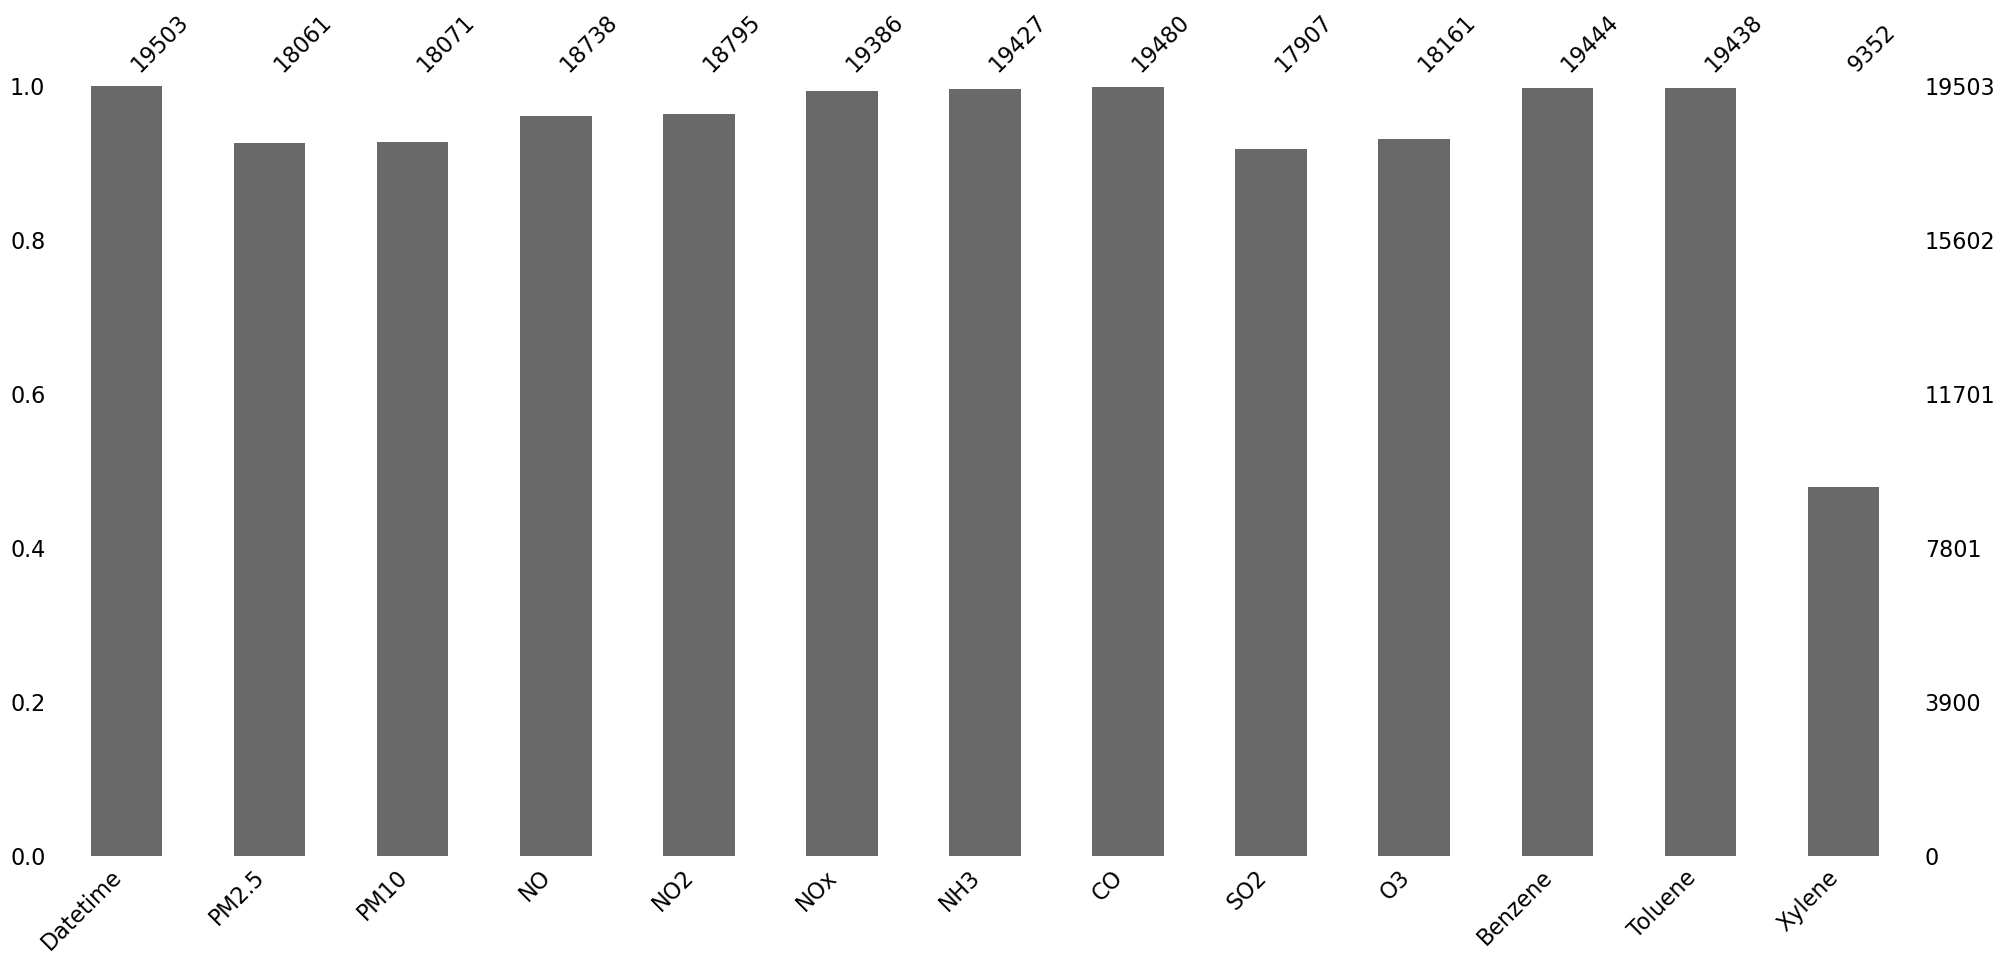

In [330]:
msno.bar(city_kolkata_df)

In [331]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [332]:
percent_missing= missing_values_table(city_kolkata_df)
percent_missing

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Xylene,10151,52.0
SO2,1596,8.2
PM2.5,1442,7.4
PM10,1432,7.3
O3,1342,6.9
NO,765,3.9
NO2,708,3.6
NOx,117,0.6
NH3,76,0.4
Toluene,65,0.3


<Axes: >

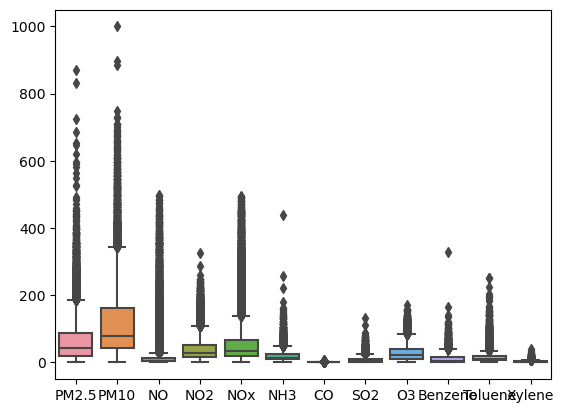

In [333]:
sbn.boxplot(data=city_kolkata_df) 

## Convert outlier values to NaN
Because outlier values can be influence predict model

In [334]:
# convert oulier to NaN values
def convert_outlier(column):
    column_copy = column.copy()
    q1 = column_copy.quantile(0.25)
    q3 = column_copy.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_copy[column_copy < lower_bound] = np.nan
    column_copy[column_copy > upper_bound] = np.nan
    return column_copy
    
for column in city_kolkata_df.columns:
    if column != 'Datetime':
        city_kolkata_df[column] = convert_outlier(city_kolkata_df[column])

<Axes: >

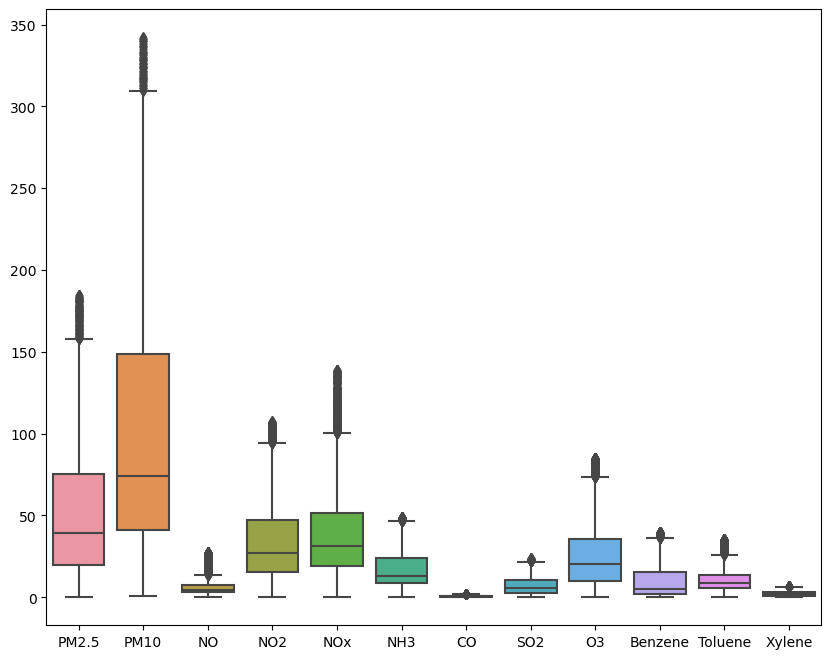

In [335]:
plt.figure(figsize=(10, 8))        
sbn.boxplot(data=city_kolkata_df) 

## Replace all NaN values by using Imputations technical for time series data
* Foward fill: replace NaN values by before observed value
* Back fill: replace NaN values by next observed value
* Linear Interpolation: 

In [336]:
##Linear Interpolation

for column in city_kolkata_df.columns:
    if column != 'Datetime':
        city_kolkata_df[column] = city_kolkata_df[column].interpolate(method='linear')

In [337]:
city_kolkata_df.isnull().sum()

Datetime       0
PM2.5          0
PM10           0
NO            30
NO2            0
NOx           30
NH3            5
CO             0
SO2            1
O3            30
Benzene       30
Toluene       30
Xylene      9988
dtype: int64

In [338]:
# nhận thấy sau khi nội suy hầu hết các feature đều có tỉ lệ missing < 0.2% => không đáng kể so với dataset, không
# ảnh hưởng đến dự đoán sau này
# Có feature 'Xylene' là có tỷ lệ missing 50% => không thể đại diện cho cả feature đó => loại bỏ
city_kolkata_df = city_kolkata_df.drop(['Xylene'], axis=1)

In [339]:
city_kolkata_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
count,19503.000000,19503.000000,19473.000000,19503.000000,19473.000000,19498.000000,19503.000000,19502.000000,19473.000000,19473.000000,19473.000000
mean,56.004519,104.611040,8.046212,36.197464,48.253021,17.470695,0.738513,7.502458,29.040511,10.244347,12.852686
std,48.009528,85.535421,6.378220,26.862895,35.254090,11.145217,0.496668,5.806251,21.928937,10.681619,9.532502
min,0.020000,0.750000,0.020000,0.160000,0.000000,0.010000,0.000000,0.070000,0.020000,0.000000,0.000000
25%,18.730000,37.993906,3.400000,14.915000,20.520000,8.980000,0.390000,2.580000,11.610000,1.830000,6.060000
50%,38.160000,70.410000,5.290000,27.860000,35.640000,13.610000,0.570000,5.720000,22.880000,5.150000,9.640000
75%,81.140000,153.805000,11.060000,51.215000,67.770000,24.900000,1.060000,11.157500,41.170000,17.100000,17.700000
max,184.840000,342.230000,27.580000,107.440000,138.790000,48.980000,2.060000,23.760000,85.350000,40.170000,35.560000


In [340]:
# No missing data
city_kolkata_df

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
456167,2018-04-10 10:00:00,34.82,54.45,NaN,51.45,NaN,NaN,1.13,NaN,NaN,NaN,NaN
456168,2018-04-10 11:00:00,31.82,57.80,NaN,33.83,NaN,NaN,1.02,10.99,NaN,NaN,NaN
456169,2018-04-10 12:00:00,29.61,51.04,NaN,16.60,NaN,NaN,0.94,8.16,NaN,NaN,NaN
456170,2018-04-10 13:00:00,33.37,51.61,NaN,18.79,NaN,NaN,0.91,6.62,NaN,NaN,NaN
456171,2018-04-10 14:00:00,36.71,58.00,NaN,23.19,NaN,NaN,0.91,6.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
475665,2020-06-30 20:00:00,12.98,39.43,9.15,17.86,26.53,12.54,0.45,6.30,16.69,2.97,12.59
475666,2020-06-30 21:00:00,14.51,38.65,6.78,13.22,19.93,12.64,0.38,5.66,15.82,3.17,13.34
475667,2020-06-30 22:00:00,13.64,36.66,5.62,10.66,16.20,12.64,0.33,5.09,15.53,2.25,11.95
475668,2020-06-30 23:00:00,12.02,33.93,6.87,11.12,18.02,12.77,0.34,4.91,13.76,2.00,10.75


<Axes: >

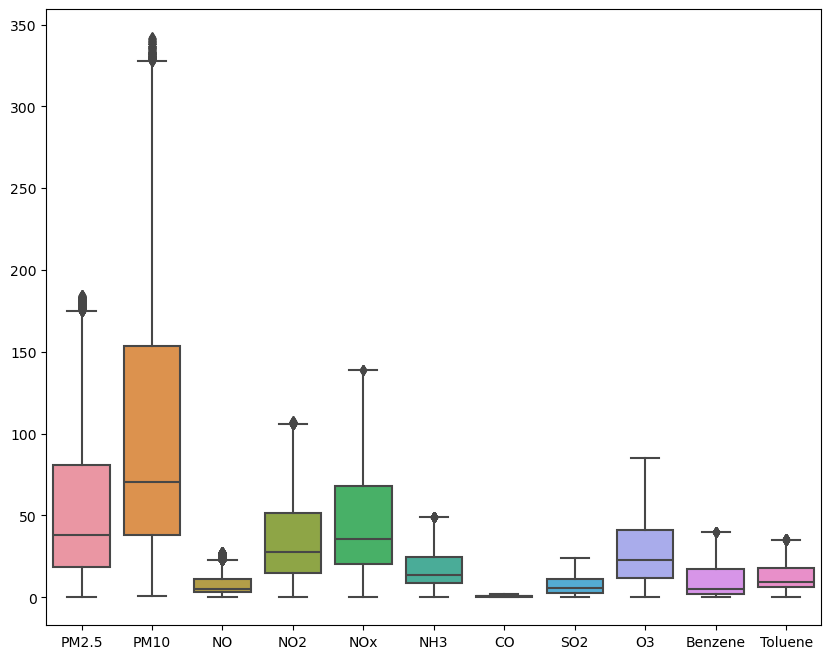

In [341]:
plt.figure(figsize=(10, 8))        
sbn.boxplot(data=city_kolkata_df) 

<Axes: >

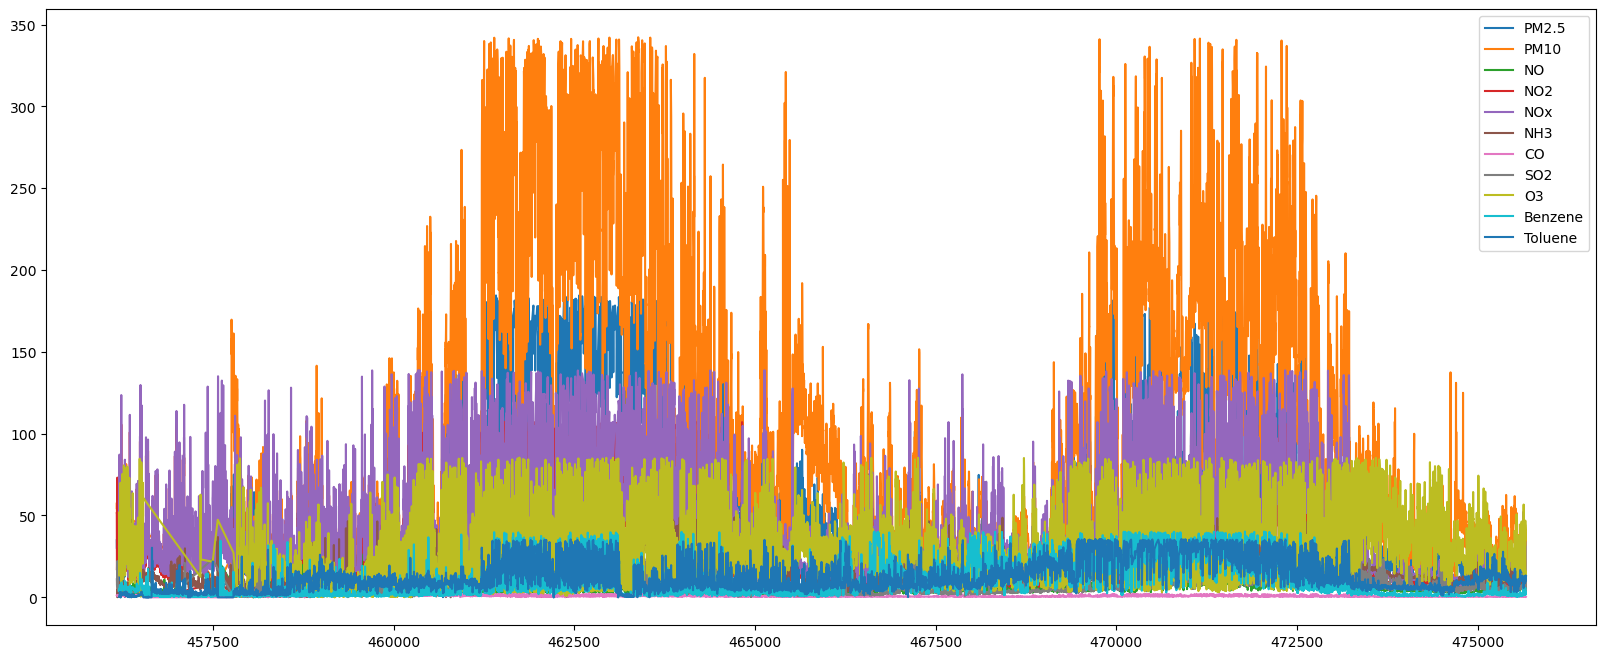

In [342]:
city_kolkata_df.plot(figsize=(20,8))